In [2]:
import pandas as pd

In [12]:
df = pd.read_csv(r"C:\Users\shrav\Documents\Machine Learning\AI Project\KalskiIMDBReviews")

In [13]:
df = df.drop("Unnamed: 0", axis = 1)

In [14]:
df

,Reviews
0,"Good attempt, story and is engaging, but"
1,A visual treat with a strong story & characters
2,Kalki: Epic Vision and Illuminating Indian His...
3,Kalki 2898: Is a Cinematic Masterpiece
4,"Majestic at scale, grandeur in VFX, and great ..."
...,...
620,Amitabh Bachchan & a power packed 2nd half red...
621,Delight
622,Kalki 2898 AD: A Visual Feast with Narrative H...
623,"A Promising Start, Hampered Execution."


In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [19]:
sent = SentimentIntensityAnalyzer()

In [20]:
def SentiementAnalysis(text):
    score = sent.polarity_scores(text)["compound"]

    if score>0.1:
        return "Positive"
    elif score<= (-0.1):
        return "Negative"
    else:
        return "Neautral"

In [21]:
df["Result"] = df["Reviews"].apply(SentiementAnalysis)

In [22]:
df

,Reviews,Result
0,"Good attempt, story and is engaging, but",Positive
1,A visual treat with a strong story & characters,Positive
2,Kalki: Epic Vision and Illuminating Indian His...,Positive
3,Kalki 2898: Is a Cinematic Masterpiece,Positive
4,"Majestic at scale, grandeur in VFX, and great ...",Positive
...,...,...
620,Amitabh Bachchan & a power packed 2nd half red...,Neautral
621,Delight,Positive
622,Kalki 2898 AD: A Visual Feast with Narrative H...,Neautral
623,"A Promising Start, Hampered Execution.",Positive


In [26]:
from sklearn.model_selection import train_test_split
X = df['Reviews']
y = df['Result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [29]:

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)


model = LogisticRegression()
model.fit(X_train_vectors, y_train)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

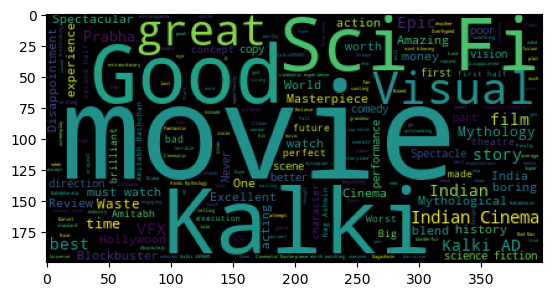

In [30]:
x = ' '.join(df["Reviews"].values)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud().generate(x)
plt.imshow(cloud)

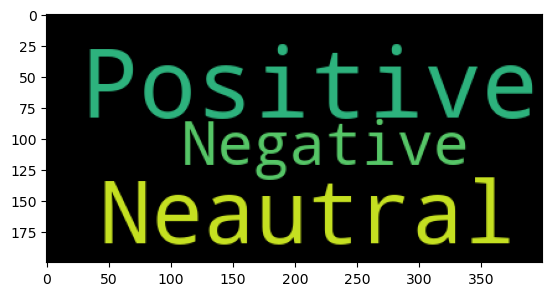

In [31]:
x = ' '.join(df["Result"].values)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud().generate(x)
plt.imshow(cloud)

In [32]:
df

,Reviews,Result
0,"Good attempt, story and is engaging, but",Positive
1,A visual treat with a strong story & characters,Positive
2,Kalki: Epic Vision and Illuminating Indian His...,Positive
3,Kalki 2898: Is a Cinematic Masterpiece,Positive
4,"Majestic at scale, grandeur in VFX, and great ...",Positive
...,...,...
620,Amitabh Bachchan & a power packed 2nd half red...,Neautral
621,Delight,Positive
622,Kalki 2898 AD: A Visual Feast with Narrative H...,Neautral
623,"A Promising Start, Hampered Execution.",Positive


In [34]:
df[df["Result"]=="Negative"]

,Reviews,Result
5,"Atrocious first half, forced comedy and terrib...",Negative
11,Copy Paste Hollywood + Mahabharat cuts,Negative
15,The World is onto selfish side...!!!,Negative
17,All rigged,Negative
20,Huge Disappointment !!! No Story Bad Editing,Negative
...,...,...
612,Poor worldbuilding and overrated,Negative
613,Total waste of time and money,Negative
614,Poor Direction,Negative
615,Distorted mythology and a senseless first half.,Negative
